Author: Kevin Meda


Based on course: Machine Learning A-Z from Udemy

# Neural Network Model for Classification

### Model to predict if a customer will leave a bank based on his personal and bank account data

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Data Preprocessing

### Importing the dataset

In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [7]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [78]:
dataset.shape

(10000, 14)

### Check for NaN Values

In [63]:
dataset.isnull().values.any()

False

### Find probable correlation among variables

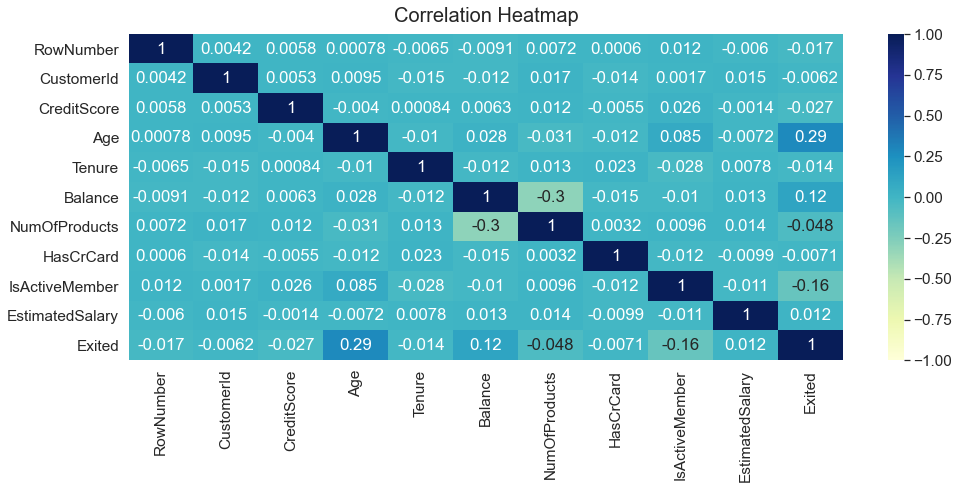

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);


### Splitting label and features

In [9]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [10]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [11]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Encoding Gender and country

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [13]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [16]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model NN

### Initializing the NN

In [19]:
ann = tf.keras.models.Sequential()

### Adding layers

In [20]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [21]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer with Activation layer Sigmoid

In [22]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training the NN with Adam optimizer

In [23]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the NN on the Training set with 100 epochs

In [17]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.8037 - accuracy: 0.5185
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.7901
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7952
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7979
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7994
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8049
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8119
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8238
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8355
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3720 - accura

## Making the predictions and evaluating the model

### Predict result for a single customer

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

### Will the customer leave the bank?

In [69]:
#France is 1,0,0 after encoding
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


### Predicting the Test set results

In [45]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [1 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix and accuracy score

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy score", accuracy_score(y_test, y_pred))

[[1306  289]
 [ 358   47]]
accuracy score 0.6765
